# Explore Multimodal RAG abilities to read multiple source

In [1]:
# Import Libraries

from IPython.display import Markdown, display
from vertexai.generative_models import (
    Content,
    GenerationConfig,
    GenerationResponse,
    GenerativeModel,
    HarmCategory,
    HarmBlockThreshold,
    Image,
    Part,
)

In [2]:
# Load Model
text_model = GenerativeModel("gemini-1.0-pro")
multimodal_model = GenerativeModel("gemini-1.0-pro-vision")

In [3]:
# Import helper functions
from utils.intro_multimodal_rag_utils import get_document_metadata

In [ ]:
# Specify the PDF folder with multiple PDF

# pdf_folder_path = "/content/data/" # if running in Google Colab/Colab Enterprise
pdf_folder_path = "data_similar/"  # if running in Vertex AI Workbench.

# Specify the image description prompt. Change it
image_description_prompt = """Explain what is going on in the image.
If it's a table, extract all elements of the table.
If it's a graph, explain the findings in the graph.
Do not include any numbers that are not mentioned in the image.
"""

# Extract text and image metadata from the PDF document
text_metadata_df, image_metadata_df = get_document_metadata(
    multimodal_model,  # we are passing gemini 1.0 pro vision model
    pdf_folder_path,
    image_save_dir="images",
    image_description_prompt=image_description_prompt,
    embedding_size=1408,
    # add_sleep_after_page = True, # Uncomment this if you are running into API quota issues
    # sleep_time_after_page = 5,
    # generation_config = # see next cell
    # safety_settings =  # see next cell
)

print("\n\n --- Completed processing. ---")



 Processing the file: --------------------------------- data_similar/A Review of Personal Data Protection Law in Indonesia.pdf 


Processing page: 1
Processing page: 2
Extracting image from page: 2, saved as: images/A Review of Personal Data Protection Law in Indonesia.pdf_image_1_0_120.jpeg
Processing page: 3
Processing page: 4
Extracting image from page: 4, saved as: images/A Review of Personal Data Protection Law in Indonesia.pdf_image_3_0_136.jpeg
Processing page: 5
Processing page: 6
Processing page: 7


 Processing the file: --------------------------------- data_similar/indonesia_personal_data_protection_googlecloud_whitepaper.pdf 


Processing page: 1
Extracting image from page: 1, saved as: images/indonesia_personal_data_protection_googlecloud_whitepaper.pdf_image_0_0_6.jpeg


In [ ]:
text_metadata_df.head()

In [ ]:
image_metadata_df.head()

In [7]:
from utils.intro_multimodal_rag_utils import (
    get_similar_text_from_query,
    print_text_to_text_citation,
    get_similar_image_from_query,
    print_text_to_image_citation,
    get_gemini_response,
    display_images,
)

## Text Search Query

### Indonesia PDP Law Definition

In [8]:
query = "What is indonesia pdp law?"

In [9]:
# Matching user text query with "chunk_embedding" to find relevant chunks.
matching_results_text = get_similar_text_from_query(
    query,
    text_metadata_df,
    column_name="text_embedding_chunk",
    top_n=3,
    chunk_text=True,
)

# Print the matched text citations
print_text_to_text_citation(matching_results_text, print_top=False, chunk_text=True)

Citation 1: Matched text: 

score:  0.8
file_name:  indonesia_personal_data_protection_googlecloud_whitepaper.pdf
page_number:  4
chunk_number:  1
chunk_text:  Google Cloud
enumerated set of processing principles, including that organizations must notify data subjects of the
purposes for which they process personal data, must process personal data in a limited, specic,
transparent, and lawful manner, and must protect the security of personal data from unauthorized access,
unauthorized disclosure, unauthorized alteration, misuse, destruction, and loss.
The PDP Law applies to both organizations located within Indonesia and those located outside
Indonesia, if the organizations data processing activities have legal consequences within Indonesia or
affect Indonesian citizens outside of Indonesia. In this respect, the PDP Law has a broader scope of
applicability than most other data protection laws, many of which only apply to activity within the
country or directed to country residents.
Enf

In [10]:
print("\n **** Result: ***** \n")

# All relevant text chunk found across documents based on user query
context = "\n".join(
    [value["chunk_text"] for key, value in matching_results_text.items()]
)

instruction = f"""Answer the question with the given context.
Question: {query}
Context: {context}
Answer:
"""

# Prepare the model input
model_input = instruction

# Generate Gemini response with streaming output
get_gemini_response(
    text_model,  # we are passing Gemini 1.0 Pro
    model_input=model_input,
    stream=True,
    generation_config=GenerationConfig(temperature=0.2, max_output_tokens=2048),
)


 **** Result: ***** 



'The Indonesia Personal Data Protection Law (PDP Law) regulates the collection, use, disclosure, and other processing of personal data by international organizations and governmental and private entities.'

#### Conclusion

On this question, this model finds top three similar text passages from a metadata DataFrame based on the question.
This model get 2 matched citations on main source (Indonesia PDP Googlecloud) and one from additional source (Review of PDP Law - Paper). 

### Controller vs Processor Definitions

In [23]:
query = "What are controllers and processors"

In [24]:
# Matching user text query with "chunk_embedding" to find relevant chunks.
matching_results_text = get_similar_text_from_query(
    query,
    text_metadata_df,
    column_name="text_embedding_chunk",
    top_n=3,
    chunk_text=True,
)

# Print the matched text citations
print_text_to_text_citation(matching_results_text, print_top=False, chunk_text=True)

Citation 1: Matched text: 

score:  0.69
file_name:  indonesia_personal_data_protection_googlecloud_whitepaper.pdf
page_number:  3
chunk_number:  3
chunk_text:  erson,
public agency, or international organization that acts individually or jointly in determining the purposes
of and exercising control over the processing of personal data. A Processor is a person, public agency,
or international organization that acts individually or jointly in processing personal data on behalf of a
Controller. The law imposes particular obligations on the processing of Specic Personal Data 
which includes more sensitive categories of data such as health data, biometric information, and
childrens data  such as by requiring data protection impact assessments where a Controller
processes Specic Personal Data.
The PDP Law sets forth responsibilities for organizations and privacy rights for individuals. It shares
several concepts with other data protection laws, such as a requirement to process personal data

In [25]:
print("\n **** Result: ***** \n")

# All relevant text chunk found across documents based on user query
context = "\n".join(
    [value["chunk_text"] for key, value in matching_results_text.items()]
)

instruction = f"""Answer the question with the given context.
Question: {query}
Context: {context}
Answer:
"""

# Prepare the model input
model_input = instruction

# Generate Gemini response with streaming output
get_gemini_response(
    text_model,  # we are passing Gemini 1.0 Pro
    model_input=model_input,
    stream=True,
    generation_config=GenerationConfig(temperature=0.2, max_output_tokens=2048),
)


 **** Result: ***** 



'Controllers are persons, public agencies, or international organizations that determine the purposes of and exercise control over the processing of personal data. Processors are persons, public agencies, or international organizations that process personal data on behalf of a Controller.'

#### Conclusion

Same as the first question, this model finds top three similar citations, first from the main source (Indonesia PDP Googlecloud) and the rest are from additional source (Review of PDP Law - Paper). 

### Unrelated question

In [27]:
query = "Who is Indonesia President?"

matching_results_text = get_similar_text_from_query(
    query,
    text_metadata_df,
    column_name="text_embedding_chunk",
    top_n=3,
    chunk_text=True,
)

print("\n **** Result: ***** \n")

# All relevant text chunk found across documents based on user query
context = "\n".join(
    [value["chunk_text"] for key, value in matching_results_text.items()]
)

instruction = f"""Answer the question with the given context.
Question: {query}
Context: {context}
Answer:
"""

# Prepare the model input
model_input = instruction

# Generate Gemini response with streaming output
get_gemini_response(
    text_model,  # we are passing Gemini 1.0 Pro
    model_input=model_input,
    stream=True,
    generation_config=GenerationConfig(temperature=0.2, max_output_tokens=2048),
)


 **** Result: ***** 



'Joko Widodo'

#### Conclusion

The model can answer queries that are not relevant to the topic because on the supporting documents (Review of PDP Law - Paper) contain information that is relevant to the query.

## Image Search Test

In [28]:
query = "How many active social media users in Indonesia?"


 **** Result: ***** 



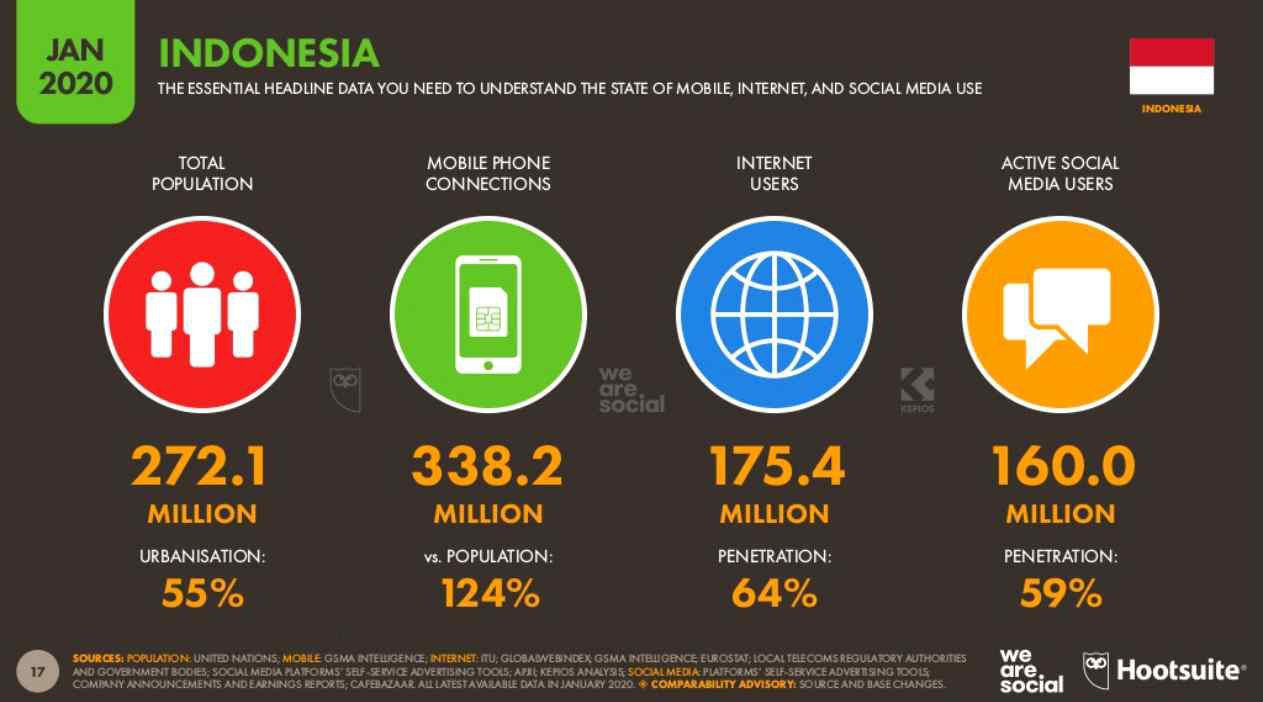

In [29]:
matching_results_image = get_similar_image_from_query(
    text_metadata_df,
    image_metadata_df,
    query=query,
    column_name="text_embedding_from_image_description",  # Use image description text embedding
    image_emb=False,  # Use text embedding instead of image embedding
    top_n=3,
    embedding_size=1408,
)

# Markdown(print_text_to_image_citation(matching_results_image, print_top=True))
print("\n **** Result: ***** \n")

# Display the top matching image
display(matching_results_image[0]["image_object"])

In [30]:
print("\n **** Result: ***** \n")

# All relevant text chunk found across documents based on user query
context = f"""Image: {matching_results_image[0]['image_object']}
Description: {matching_results_image[0]['image_description']}
"""

instruction = f"""Answer the question in JSON format with the given context of Image and its Description:
Question: {query}
Context: {context}
Answer:
"""

# Prepare the model input
model_input = instruction

# Generate Gemini response with streaming output
Markdown(
    get_gemini_response(
        multimodal_model,  # we are passing Gemini 1.0 Pro Vision
        model_input=model_input,
        stream=True,
        generation_config=GenerationConfig(temperature=0.2, max_output_tokens=2048),
    )
)


 **** Result: ***** 



{
 "answer": "160 million"
}